## Домашнее задание к занятию от 23.09.2019 г. «Кейс-стади. Статистические показатели в Python»
ФИО: Кривова Татьяна Сергеевна

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

**1. Загрузить датасет**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
raw_data = pd.read_csv('creditcard.csv') # raw_data.shape --> (284807, 31)

In [3]:
raw_data.info()
raw_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [5]:
raw_data.isna().sum() # Количество отсутствующих значений в каждом столбце

# Вывод: отсутствующих значений (Nan элементов) нет.

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [6]:
df = raw_data[['Amount', 'Class']]
len(df[df.Class == 1]), len(df[df.Class == 0]) # Количество элементов в классах: 1 - 492, 0 - 284315

(492, 284315)

Text(0.5, 1.0, 'График для параметра Class (plot.bar)')

Text(0.5, 0, 'Класс сделки')

Text(0, 0.5, 'Количество элементов')

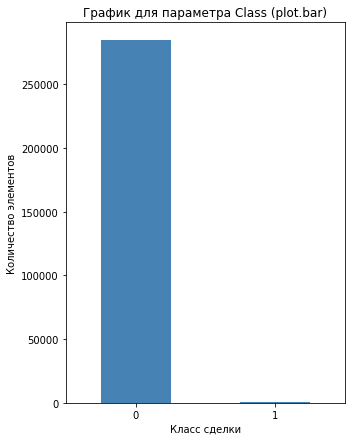

In [7]:
rcParams['figure.figsize'] = 5,7

df.Class.value_counts().plot.bar(color="steelblue", rot=0)

plt.title('График для параметра Class (plot.bar)')
plt.xlabel('Класс сделки')
plt.ylabel('Количество элементов')

Text(0.5, 1.0, 'График для параметров Class и медианы Amount (sns.barplot)')

Text(0.5, 0, 'Класс сделки')

Text(0, 0.5, 'Amount медиана')

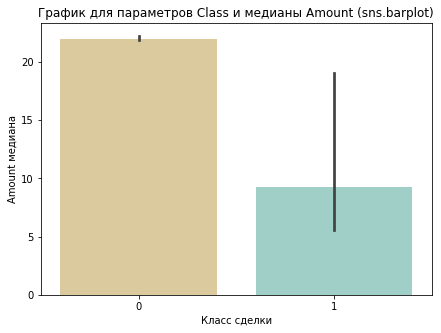

In [8]:
rcParams['figure.figsize'] = 7,5
sns.barplot(x='Class', y='Amount', data=df, estimator=np.median, palette='BrBG')

plt.title('График для параметров Class и медианы Amount (sns.barplot)')
plt.xlabel('Класс сделки')
plt.ylabel('Amount медиана')

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [9]:
first_sample = df[df.Class == 0]['Amount'] # нормальные операции
second_sample = df[df.Class == 1]['Amount'] # обманные операции

first_sample.sum(), second_sample.sum() # сколько денег было использовано суммарно в разрезе класса операций

(25102462.04, 60127.97)

In [10]:
first_sample.describe() # Смотрим основные статистики
second_sample.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

(array([2.75533e+05, 5.98600e+03, 1.53200e+03, 6.26000e+02, 2.26000e+02,
        1.44000e+02, 9.20000e+01, 6.90000e+01, 3.30000e+01, 2.20000e+01,
        1.00000e+01, 1.10000e+01, 5.00000e+00, 5.00000e+00, 5.00000e+00,
        5.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.    ,   513.8232,  1027.6464,  1541.4696,  2055.2928,
         2569.116 ,  3082.9392,  3596.7624,  4110.5856,  4624.4088,
         5138.232 ,  5652.0552,  6165.8784,  6679.7016,  7193.5248,
         7707.348 ,  8221.1712,  8734.9944,  9248.8176,  9762.64

Text(0.5, 0, 'Amount_values')

Text(0, 0.5, 'Frequency')

(array([296.,  29.,  61.,   9.,  15.,  11.,   8.,  12.,   8.,   1.,   5.,
          2.,   5.,   2.,   3.,   2.,   3.,   4.,   3.,   2.,   0.,   1.,
          0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   2.,   2.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.    ,   42.5174,   85.0348,  127.5522,  170.0696,  212.587 ,
         255.1044,  297.6218,  340.1392,  382.6566,  425.174 ,  467.6914,
         510.2088,  552.7262,  595.2436,  637.761 ,  680.2784,  722.7958,
         765.3132,  807.8306,  850.348 ,  892.8654,  935.3828,  977.9002,
        1020.4176, 1062.935 , 1105.4524, 1147.9698, 1190.4872, 1233.0046,
        1275.522 , 1318.0394, 1360.5568, 1403.0742, 1445.5916, 1488.109 ,
        1530.6264, 1573.1438, 1615.6612, 1658.1786, 1700.696 , 1743.2134,
        1785.7308, 1828.2482, 1870.7656, 1913.283 , 1955.8004, 1998.3178,
        2040.8352, 2083.3526, 2125.87  ]),
 <a list of 50 Patch ob

Text(0.5, 0, 'Amount_values')

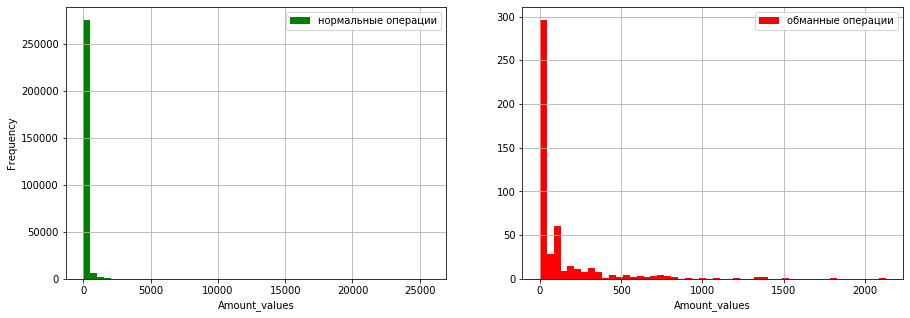

In [11]:
rcParams['figure.figsize'] = 15,5
fig = plt.figure() # Частотные графики для параметра Amount в разрезе класса операций

ax1 = fig.add_subplot(1,2,1)
ax1.hist(first_sample, bins=50, color="green", label='нормальные операции')
ax1.grid(True)
ax1.legend()
plt.xlabel('Amount_values')
plt.ylabel('Frequency')

ax2 = fig.add_subplot(1,2,2)
ax2.hist(second_sample, bins=50, color="red", label='обманные операции')
ax2.grid(True)
ax2.legend()
plt.xlabel('Amount_values')

plt.show()

**5. Построить графики histograms для всех значений**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B910A30>,
      dtype=object)

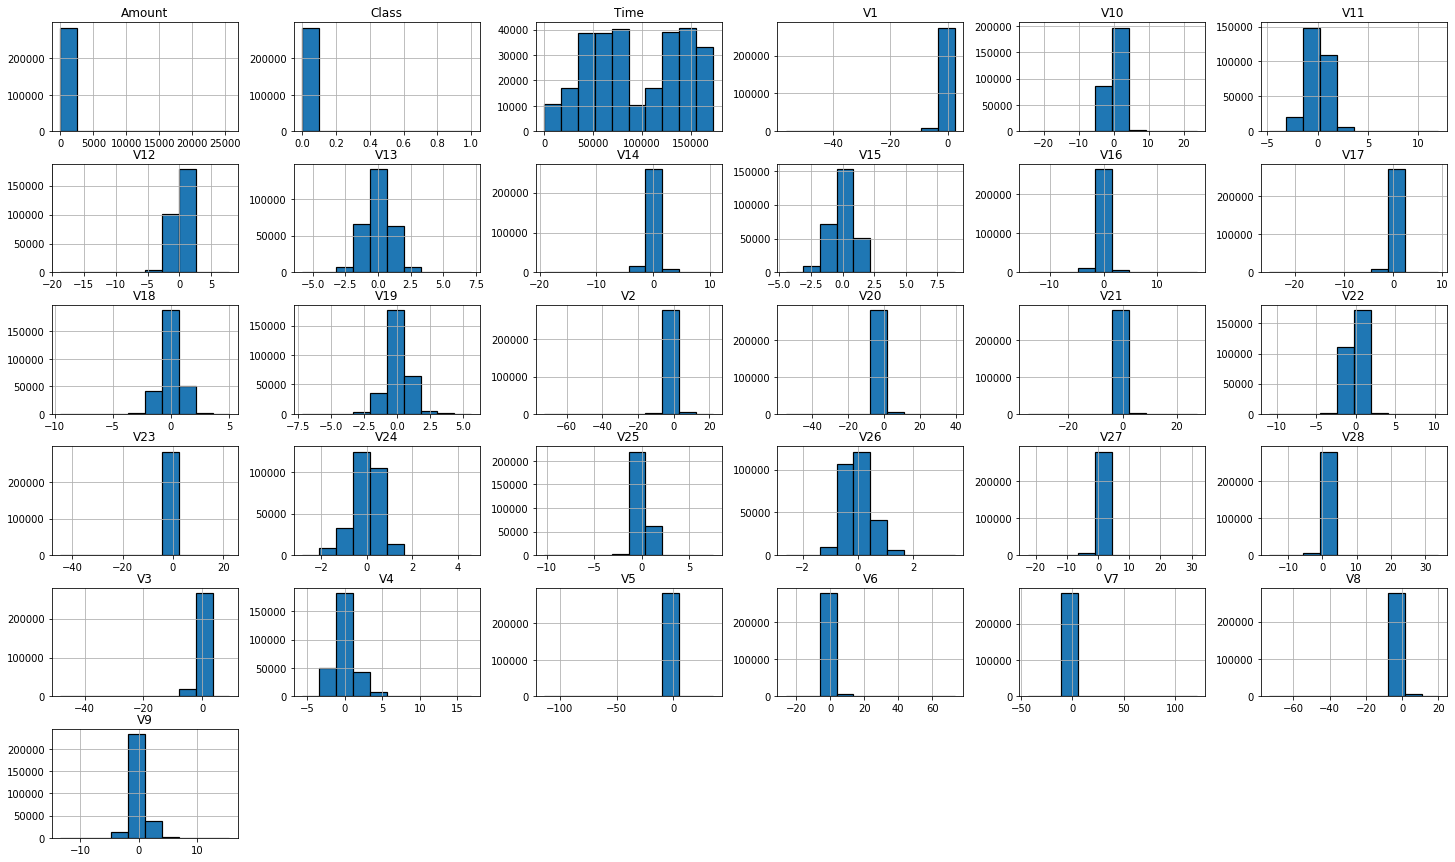

In [12]:
rcParams['figure.figsize'] = 25,15
raw_data.hist(edgecolor='black', linewidth=1.2)

**6. Построить матрицу корреляций для всех значений**

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1,0.117,-0.0106,-0.42,-0.105,0.173,-0.063,0.0847,-0.0369,-0.00866,0.0306,-0.248,0.124,-0.0659,-0.0988,-0.183,0.0119,-0.0733,0.0904,0.029,-0.0509,0.0447,0.144,0.0511,-0.0162,-0.233,-0.0414,-0.00513,-0.00941,-0.0106,-0.0123
V1,0.117,1,4.7e-17,-1.42e-15,1.76e-17,6.39e-17,2.4e-16,1.99e-15,-9.49e-17,2.17e-16,7.43e-17,2.44e-16,2.42e-16,-2.12e-16,9.35e-16,-3.25e-16,6.31e-16,-5.01e-16,2.87e-16,1.82e-16,1.04e-16,-1.76e-16,7.48e-17,9.81e-16,7.35e-17,-9.81e-16,-8.62e-17,3.21e-17,9.82e-16,-0.228,-0.101
V2,-0.0106,4.7e-17,1,2.51e-16,-1.13e-16,-2.04e-16,5.02e-16,3.97e-16,-4.41e-17,-5.73e-17,-4.78e-16,9.47e-16,-6.59e-16,3.85e-16,-2.54e-16,2.83e-16,4.93e-17,-9.88e-16,2.64e-16,9.53e-17,-9.31e-16,8.44e-17,2.5e-16,1.06e-16,-8.14e-18,-4.26e-17,2.6e-16,-4.48e-16,-3.68e-16,-0.531,0.0913
V3,-0.42,-1.42e-15,2.51e-16,1,-3.42e-16,-1.44e-15,1.43e-15,2.17e-15,3.43e-16,-4.23e-16,6.29e-16,-5.5e-17,2.21e-16,-6.88e-16,4.27e-16,1.12e-16,1.18e-15,4.58e-17,5.43e-16,2.58e-16,-9.43e-16,-2.97e-17,4.65e-16,2.12e-17,-9.35e-17,4.77e-16,6.52e-16,6.24e-16,7.73e-16,-0.211,-0.193
V4,-0.105,1.76e-17,-1.13e-16,-3.42e-16,1,-1.94e-15,-2.71e-16,1.56e-16,5.2e-16,3.86e-16,6.06e-16,-2.08e-16,-5.66e-16,-1.51e-16,-8.52e-17,-1.51e-16,-6.94e-16,-4.4e-16,1.49e-16,-2.66e-16,-3.22e-16,-9.98e-17,2.1e-16,6e-17,2.23e-16,5.39e-16,-6.18e-16,-6.4e-17,-5.86e-17,0.0987,0.133
V5,0.173,6.39e-17,-2.04e-16,-1.44e-15,-1.94e-15,1,7.93e-16,-4.21e-16,7.59e-16,4.21e-16,-6.6e-16,7.34e-16,3.76e-16,-9.58e-16,-3.63e-16,-5.13e-16,-3.52e-16,1.43e-16,1.11e-15,-3.14e-16,2.08e-16,-1.37e-16,5.06e-16,1.64e-16,-9.29e-16,5.63e-16,9.14e-16,4.47e-16,-3.3e-16,-0.386,-0.095
V6,-0.063,2.4e-16,5.02e-16,1.43e-15,-2.71e-16,7.93e-16,1,1.43e-16,-1.71e-16,1.11e-16,2.85e-16,4.87e-16,2.14e-16,-2.27e-16,3.45e-16,-6.37e-18,-2.48e-16,3.57e-16,2.81e-16,2.72e-16,1.9e-16,-1.58e-16,-3.36e-16,-7.23e-17,-1.26e-15,1.08e-15,-2.38e-16,-2.62e-16,4.81e-16,0.216,-0.0436
V7,0.0847,1.99e-15,3.97e-16,2.17e-15,1.56e-16,-4.21e-16,1.43e-16,1,-8.69e-17,7.93e-16,3.04e-17,-1.08e-15,1.51e-15,-9.89e-17,-1.73e-16,1.94e-17,2.89e-16,1.15e-15,-1.12e-16,-2.87e-16,1.74e-16,1.94e-16,-1.06e-15,2.33e-16,-2.59e-17,1.17e-15,-7.33e-16,-5.89e-16,-6.84e-17,0.397,-0.187
V8,-0.0369,-9.49e-17,-4.41e-17,3.43e-16,5.2e-16,7.59e-16,-1.71e-16,-8.69e-17,1,2.9e-16,9.05e-17,1.95e-16,-6.27e-17,-2.38e-16,-1.13e-16,2.02e-16,5.03e-16,-3.51e-16,-4.09e-16,-5.34e-16,-1.1e-16,-2.41e-16,5.48e-16,3.9e-16,-1.8e-16,-1.39e-16,-1.21e-16,1.73e-16,-4.48e-16,-0.103,0.0199
V9,-0.00866,2.17e-16,-5.73e-17,-4.23e-16,3.86e-16,4.21e-16,1.11e-16,7.93e-16,2.9e-16,1,-2.77e-16,4.68e-16,-2.45e-15,-2.65e-16,2.34e-16,-1.59e-15,-3.25e-16,6.54e-16,1.2e-16,1.12e-16,-4.34e-16,4.58e-17,2.87e-17,5.93e-16,-2.35e-16,1.1e-15,-1.39e-15,-2.29e-16,9.15e-16,-0.0442,-0.0977


E:\Python_programming\Tatiana Python2_Specialist_30-07-2019\python-29-07\python\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
E:\Python_programming\Tatiana Python2_Specialist_30-07-2019\python-29-07\python\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


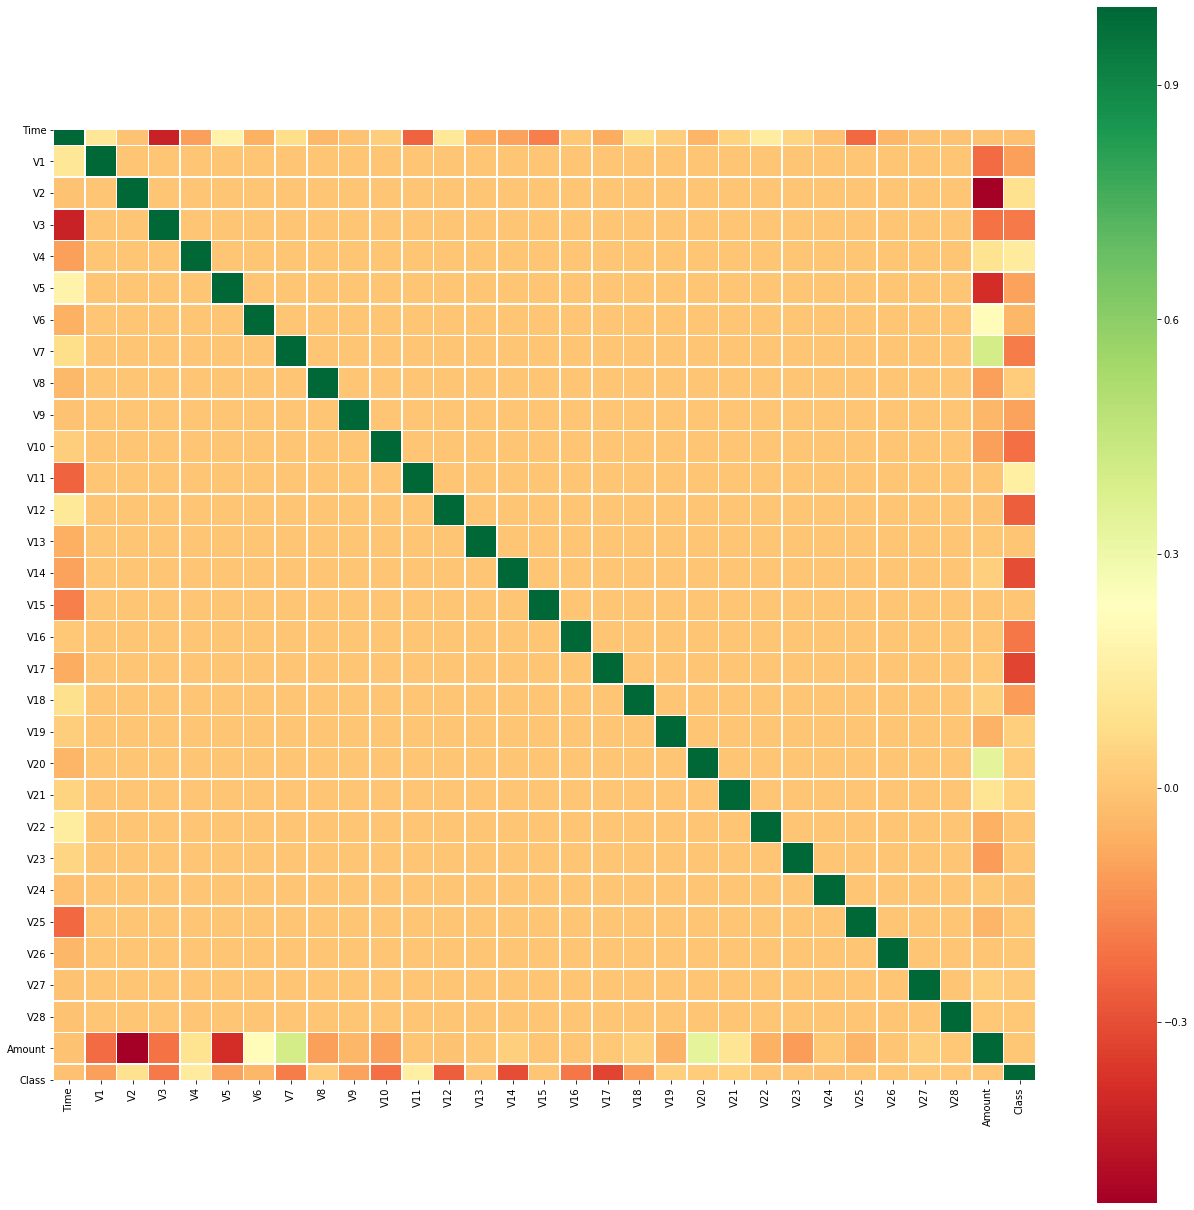

In [14]:
rcParams['figure.figsize'] = 22,22
corr_matrix = raw_data.corr()
corr_matrix.style.set_precision(3) # матрица корреляций

sns.heatmap(corr_matrix, annot=False,linewidths=.5, square=True, cmap="RdYlGn")

In [15]:
# Посмотрим, у скольких элементов корреляция > 25% 
row = 0
for element in np.triu(corr_matrix, k = 1):
    row += 1
    place = 0
    for number in element:
        place+=1
        if number > 0.25 or number < -0.25 : print(f'Номер строки {row}, элемент {place}: коэффициент корреляции {round(number,5)}')

Номер строки 1, элемент 4: коэффициент корреляции -0.41962
Номер строки 3, элемент 30: коэффициент корреляции -0.53141
Номер строки 6, элемент 30: коэффициент корреляции -0.38636
Номер строки 8, элемент 30: коэффициент корреляции 0.39731
Номер строки 13, элемент 31: коэффициент корреляции -0.26059
Номер строки 15, элемент 31: коэффициент корреляции -0.30254
Номер строки 18, элемент 31: коэффициент корреляции -0.32648
Номер строки 21, элемент 30: коэффициент корреляции 0.3394


**Параметры : коэффициент корреляции**

*V12 и Class*: -0.26059

*V14 и Class*: -0.30254

*V17 и Class*: -0.32648


*V2 и Amount*: -0.53141

*V5 и Amount*: -0.38636

*V7 и Amount*: 0.39731

*V20 и Amount*: 0.3394


*Time и V3*:  -0.41962

Вывод: нет атрибутов с корреляцией > 70-90 %, достаточно высокой для исключения.
С целевой метрикой Class корреляция > 25% у трех атрибутов V17, V14 и V12 (будем их использовать далее в моделях).

In [16]:
# Посмотрим feature_importances

output_y = raw_data.Class
input_x = raw_data.loc[:, :'Amount']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Text(0.5, 0, 'Важность атрибутов')

Text(0, 0.5, 'Атрибуты')

Text(0.5, 1.0, 'Наиболее важные атрибуты')

No handles with labels found to put in legend.


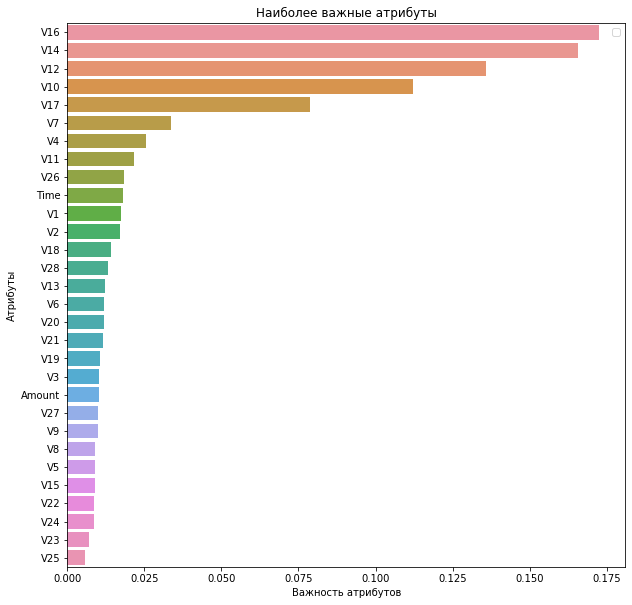

In [18]:
# создаем модель деревья решений
model=RandomForestClassifier(n_estimators=10)

# обучаем модель
model.fit(X_train,y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

**7. Выбрать несколько элементов исходя из матрицы корреляций для предсказания таргет значения Class. Построить модель логистической регрессии. Разделить датасет на 80% тренировочных данных и 20% тестовых данных. Для fit метода использовать тренировочные данные, проверить качество модели на тестовых данных. Почему модель дает такой результат?**

In [19]:
# Вывод: для построения моделей беру следующие 10 атрибутов:
# V12, V17, V16, V14, V9, V10, V3, V26, V4, V1 и target-value Class

model_data = raw_data[['V12', 'V17', 'V16', 'V14', 'V9', 'V10', 'V3', 'V26', 'V4', 'V1', 'Class']]

model_data.shape
model_data.head()

(284807, 11)

,V12,V17,V16,V14,V9,V10,V3,V26,V4,V1,Class
0,-0.617801,0.207971,-0.470401,-0.311169,0.363787,0.090794,2.536347,-0.189115,1.378155,-1.359807,0
1,1.065235,-0.114805,0.463917,-0.143772,-0.255425,-0.166974,0.166480,0.125895,0.448154,1.191857,0
2,0.066084,1.109969,-2.890083,-0.165946,-1.514654,0.207643,1.773209,-0.139097,0.379780,-1.358354,0
3,0.178228,-0.684093,-1.059647,-0.287924,-1.387024,-0.054952,1.792993,-0.221929,-0.863291,-0.966272,0
4,0.538196,-0.237033,-0.451449,-1.119670,0.817739,0.753074,1.548718,0.502292,0.403034,-1.158233,0


Посмотрим выбросы для каждой переменной, в разрезе обоих классов non_fraud_df и fraud_df

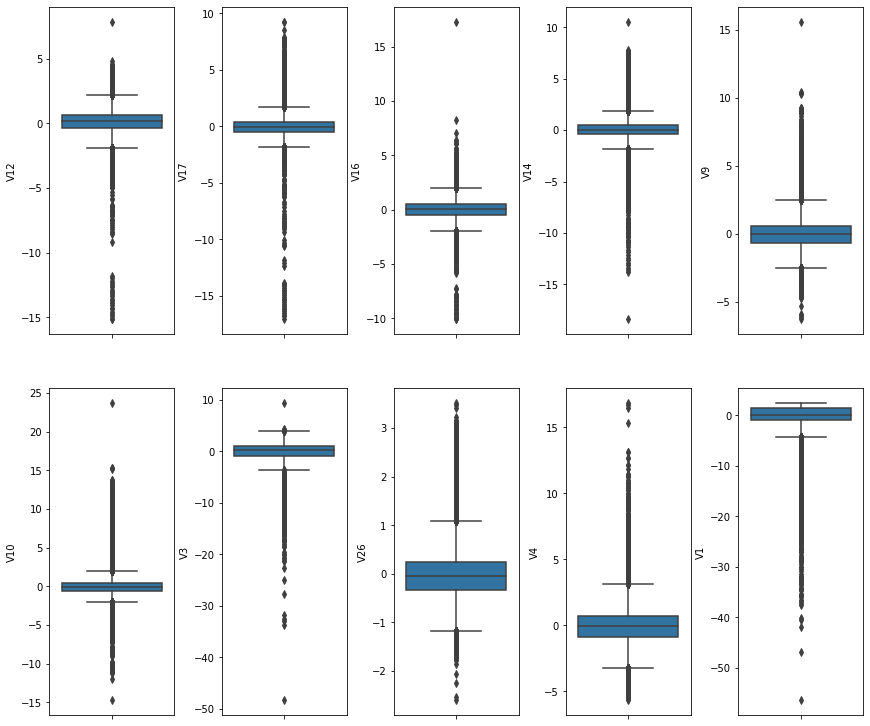

In [20]:
non_fraud_df = model_data[model_data.Class==0]

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(12, 10))
index = 0
axs = axs.flatten()
for k,v in non_fraud_df[['V12', 'V17', 'V16', 'V14', 'V9', 'V10', 'V3', 'V26', 'V4', 'V1']].items():
    sns.boxplot(y=k, data=non_fraud_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [21]:
non_fraud_outliers = non_fraud_df[['V12', 'V17', 'V16', 'V14', 'V9', 'V10', 'V3', 'V26', 'V4', 'V1']].describe().loc[['25%','75%'],:]

non_fraud_outliers.loc['IQ'] = 0 # interquartile range: IQ
non_fraud_outliers.loc['Q1 - 1.5*IQ'] = 0 # lower inner fence: Q1 - 1.5*IQ
non_fraud_outliers.loc['Q3 + 1.5*IQ'] = 0 # upper inner fence: Q3 + 1.5*IQ
non_fraud_outliers.loc['Q1 - 3*IQ'] = 0 # lower outer fence: Q1 - 3*IQ
non_fraud_outliers.loc['Q3 + 3*IQ'] = 0 # upper outer fence: Q3 + 3*IQ

In [22]:
for col,val in non_fraud_outliers.items():
    non_fraud_outliers[col]['IQ'] = val[1]-val[0]
    non_fraud_outliers[col]['Q1 - 1.5*IQ'] = val[0] - 1.5*(val[1]-val[0])
    non_fraud_outliers[col]['Q3 + 1.5*IQ'] = val[1] + 1.5*(val[1]-val[0])
    non_fraud_outliers[col]['Q1 - 3*IQ'] = val[0] - 3*(val[1]-val[0])
    non_fraud_outliers[col]['Q3 + 3*IQ'] = val[1] + 3*(val[1]-val[0])

In [23]:
non_fraud_df.head()
non_fraud_outliers

,V12,V17,V16,V14,V9,V10,V3,V26,V4,V1,Class
0,-0.617801,0.207971,-0.470401,-0.311169,0.363787,0.090794,2.536347,-0.189115,1.378155,-1.359807,0
1,1.065235,-0.114805,0.463917,-0.143772,-0.255425,-0.166974,0.166480,0.125895,0.448154,1.191857,0
2,0.066084,1.109969,-2.890083,-0.165946,-1.514654,0.207643,1.773209,-0.139097,0.379780,-1.358354,0
3,0.178228,-0.684093,-1.059647,-0.287924,-1.387024,-0.054952,1.792993,-0.221929,-0.863291,-0.966272,0
4,0.538196,-0.237033,-0.451449,-1.119670,0.817739,0.753074,1.548718,0.502292,0.403034,-1.158233,0


,V12,V17,V16,V14,V9,V10,V3,V26,V4,V1
25%,-0.402102,-0.482644,-0.465543,-0.422453,-0.640412,-0.532880,-0.884541,-0.327074,-0.850077,-0.917544
75%,0.619207,0.399922,0.523738,0.494104,0.598230,0.455135,1.028372,0.240671,0.737624,1.316218
IQ,1.021310,0.882566,0.989281,0.916557,1.238642,0.988015,1.912914,0.567746,1.587700,2.233762
Q1 - 1.5*IQ,-1.934067,-1.806493,-1.949464,-1.797287,-2.498375,-2.014901,-3.753912,-1.178693,-3.231627,-4.268186
Q3 + 1.5*IQ,2.151172,1.723772,2.007659,1.868939,2.456193,1.937157,3.897742,1.092289,3.119174,4.666860
Q1 - 3*IQ,-3.466031,-3.130343,-3.433385,-3.172122,-4.356337,-3.496923,-6.623282,-2.030311,-5.613177,-7.618828
Q3 + 3*IQ,3.683136,3.047621,3.491580,3.243773,4.314156,3.419179,6.767113,1.943908,5.500724,8.017503


In [24]:
spisok_idx = []

for col,val in non_fraud_outliers.items():
    lower = non_fraud_outliers[col]['Q1 - 3*IQ']
    upper = non_fraud_outliers[col]['Q3 + 3*IQ']
# A point beyond an outer fence is considered an extreme outlier.
# Добавляю в список индексы строк с экстремальными выбросами:
    spisok_idx += (list(non_fraud_df[non_fraud_df[col] < lower].index) + list(non_fraud_df[non_fraud_df[col] > upper].index))

In [25]:
len(spisok_idx), len(set(spisok_idx)) # общее количество индексов в списке и количество уникальных

(11655, 7639)

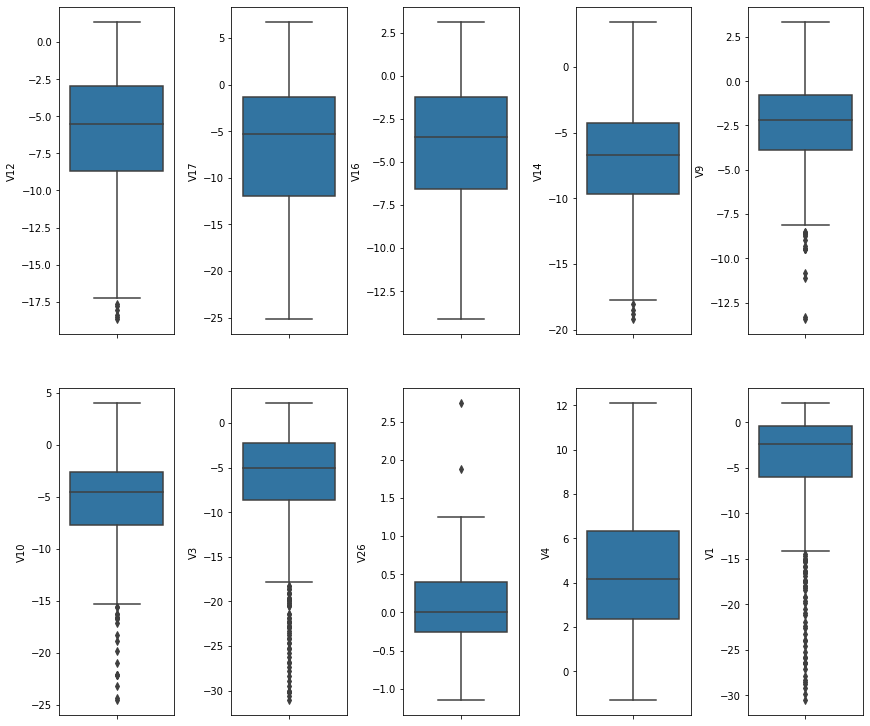

In [26]:
fraud_df = model_data[model_data.Class==1]

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(12, 10))
index = 0
axs = axs.flatten()
for k,v in fraud_df[['V12', 'V17', 'V16', 'V14', 'V9', 'V10', 'V3', 'V26', 'V4', 'V1']].items():
    sns.boxplot(y=k, data=fraud_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [27]:
fraud_outliers = fraud_df[['V12', 'V17', 'V16', 'V14', 'V9', 'V10', 'V3', 'V26', 'V4', 'V1']].describe().loc[['25%','75%'],:]

fraud_outliers.loc['IQ'] = 0
fraud_outliers.loc['Q1 - 1.5*IQ'] = 0
fraud_outliers.loc['Q3 + 1.5*IQ'] = 0
fraud_outliers.loc['Q1 - 3*IQ'] = 0
fraud_outliers.loc['Q3 + 3*IQ'] = 0

In [28]:
for col,val in fraud_outliers.items():
    fraud_outliers[col]['IQ'] = val[1]-val[0]
    fraud_outliers[col]['Q1 - 1.5*IQ'] = val[0] - 1.5*(val[1]-val[0])
    fraud_outliers[col]['Q3 + 1.5*IQ'] = val[1] + 1.5*(val[1]-val[0])
    fraud_outliers[col]['Q1 - 3*IQ'] = val[0] - 3*(val[1]-val[0])
    fraud_outliers[col]['Q3 + 3*IQ'] = val[1] + 3*(val[1]-val[0])

In [29]:
fraud_df.head()
fraud_outliers

,V12,V17,V16,V14,V9,V10,V3,V26,V4,V1,Class
541,-2.899907,-2.830056,-1.140747,-4.289254,-2.770089,-2.772272,-1.609851,0.177840,3.997906,-2.312227,1
623,-0.503141,0.599717,0.666780,-1.692029,-0.270953,-0.838587,1.088463,-0.145362,2.288644,-3.043541,1
4920,-6.560124,-4.781831,-2.282194,-1.470102,-0.238253,-1.525412,-0.359745,-0.542628,2.330243,-2.303350,1
6108,-10.912819,-12.598419,-7.358083,-6.771097,-0.247768,-4.801637,-2.592844,-0.657488,2.679787,-4.397974,1
6329,-4.609628,6.739384,2.581851,-6.079337,-1.282858,-2.447469,-4.304597,0.566797,4.732795,1.234235,1


,V12,V17,V16,V14,V9,V10,V3,V26,V4,V1
25%,-8.688177,-11.945057,-6.562915,-9.692723,-3.872383,-7.756698,-8.643489,-0.259416,2.373050,-6.036063
75%,-2.974088,-1.341940,-1.226043,-4.282821,-0.787850,-2.614184,-2.276185,0.396733,6.348729,-0.419200
IQ,5.714088,10.603117,5.336872,5.409902,3.084533,5.142514,6.367305,0.656149,3.975680,5.616863
Q1 - 1.5*IQ,-17.259309,-27.849733,-14.568223,-17.807576,-8.499183,-15.470470,-18.194446,-1.243640,-3.590470,-14.461357
Q3 + 1.5*IQ,5.597045,14.562736,6.779265,3.832032,3.838950,5.099588,7.274772,1.380957,12.312249,8.006094
Q1 - 3*IQ,-25.830442,-43.754409,-22.573531,-25.922429,-13.125983,-23.184241,-27.745403,-2.227864,-9.553990,-22.886652
Q3 + 3*IQ,14.168177,30.467412,14.784573,11.946885,8.465749,12.813359,16.825729,2.365180,18.275769,16.431389


In [30]:
for col,val in fraud_outliers.items():
    lower = fraud_outliers[col]['Q1 - 3*IQ']
    upper = fraud_outliers[col]['Q3 + 3*IQ']

    spisok_idx += (list(fraud_df[fraud_df[col] < lower].index) + list(fraud_df[fraud_df[col] > upper].index))

In [31]:
len(spisok_idx), len(set(spisok_idx)) # общее количество индексов в списке и количество уникальных

(11691, 7659)

In [32]:
# Удаляю из датафрейма model_data 7659 строк с экстремальными выбросами
rows_to_drop = list(set(spisok_idx))
model_data.drop(index=rows_to_drop, inplace=True) # model_data.shape --> (277148, 11)

E:\Python_programming\Tatiana Python2_Specialist_30-07-2019\python-29-07\python\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
# Экстремальные выбросы исключили. При этом данные существенно несбалансированные по количеству элементов в классе 0 и 1.
# Это может повлиять на качество модели логистической регрессии, проверим далее.

model_data[model_data.Class == 0].shape, model_data[model_data.Class == 1].shape

((276676, 11), (472, 11))

In [34]:
output_y = model_data.Class
input_x = model_data.loc[:, :'V1']

In [35]:
X_train_17, X_test_17, y_train_17, y_test_17 = train_test_split(input_x, output_y, train_size=0.8, random_state=17)

In [36]:
# создаем модель логистической регрессии
first_model=LogisticRegression(solver='liblinear')

# обучаем модель
first_model.fit(X_train_17, y_train_17)

# смотрим качество предсказания классов 
model_pred = first_model.predict(X_test_17)
print(classification_report(y_test_17, model_pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55353
           1       1.00      0.79      0.88        77

    accuracy                           1.00     55430
   macro avg       1.00      0.90      0.94     55430
weighted avg       1.00      1.00      1.00     55430



Для класса 1 "небезопасная транзакция" точность классификатора составляет 1.00 (100% положительных решений правильные), 
а полнота 0.79 (классификатор нашел 79% всех небезопасных транзакций).

**8. Чтобы уравновесить датасет по классу Class, выберем одинаковое количество элементов из датасета по классу.** Необходимо посчитать минимальное количество (N) элементов, посчитанное в задаче 3. Выбрать N элементов рандомно из класса, имеющего бОльшее количество элементов, и все элементы из класса имеющего меньшее количество. Таким образом, мы уравновесим датасет по количеству элементов. Смоделировать логистической регрессию на полученном датасете. Посчитать качество модели. Получилось ли улучшить модель? Если да, то засчет чего?

In [37]:
smpl = model_data[model_data.Class == 0].sample(n=472, random_state=32) 

model_3_data = pd.concat([smpl, model_data[model_data.Class == 1]])

model_3_data.shape
model_3_data.head()

(944, 11)

,V12,V17,V16,V14,V9,V10,V3,V26,V4,V1,Class
223555,-0.091090,0.164197,0.295486,-1.308718,0.057545,-0.637911,-0.334746,0.095584,-0.624920,0.246646,0
90411,1.224953,0.087129,0.140466,0.570518,-0.085446,-0.887997,0.578980,-0.431898,1.289519,-5.028045,0
83701,1.024959,0.787251,-1.081225,-0.635091,1.185067,-0.655673,0.652563,-0.564302,2.136173,0.093595,0
274118,0.061014,-0.336810,0.614069,-1.178978,-0.411116,-1.503478,-0.197313,-0.154373,-1.122799,-0.406724,0
281686,1.044934,-0.602550,0.127780,0.455465,0.301184,0.234229,-1.181861,0.204030,0.214991,2.035416,0


In [38]:
output_y_3 = model_3_data.Class
input_x_3 = model_3_data.loc[:, :'V1']

In [39]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(input_x_3, output_y_3, train_size=0.8, random_state=3)

In [40]:
# создаем модель логистической регрессии
third_model=LogisticRegression(solver='liblinear')

# обучаем модель
third_model.fit(X_train_3, y_train_3)

# смотрим качество предсказания классов 
third_model_pred = third_model.predict(X_test_3)
print(classification_report(y_test_3, third_model_pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       101
           1       0.96      0.93      0.95        88

    accuracy                           0.95       189
   macro avg       0.95      0.95      0.95       189
weighted avg       0.95      0.95      0.95       189



Вывод: из-за уменьшения количества элементов в классе 0 "нормальная транзакция" значения precision и recall ухудшились. 
При этом для класса 1 "небезопасная транзакция" точность классификатора составляет 0.96 (96% положительных решений правильные), а полнота 0.93 (классификатор нашел 93% всех небезопасных транзакций).
Можно сказать, что за счет балансировки классов модель стала лучше.

**9. Написать модель RandomForestClassifier на данный датасет и сравнить результаты с логистической регрессией. Почему результаты получились лучше (или хуже). Тренировочные и тестовые данные выбираем одинаковые (те же, что и для логистической регрессии), полученные на шаге 7.**

In [41]:
# создаем модель деревья решений
second_model=RandomForestClassifier(n_estimators=25)

# обучаем модель
second_model.fit(X_train_17, y_train_17)

# смотрим качество предсказания классов 
second_model_pred = second_model.predict(X_test_17)
print(classification_report(y_test_17, second_model_pred))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55353
           1       1.00      0.82      0.90        77

    accuracy                           1.00     55430
   macro avg       1.00      0.91      0.95     55430
weighted avg       1.00      1.00      1.00     55430



Результат модели RandomForestClassifier получился лучше, чем LogisticRegression на одинаковых данных.
Т.к. RandomForestClassifier работает без балансировки классов.
Для класса 1 "небезопасная транзакция" точность классификатора составляет 1.00 (100% положительных решений правильные), а полнота 0.82 (классификатор нашел 82% всех небезопасных транзакций).